# Google Fushion Tables Demo

Data visualization examples modified from [Introduction to Data Mapping with Fusion Tables](http://www.padjo.org/tutorials/mapping/basic-fusion-tables/) by Dan Nguyen.

**Download this dataset as a CSV**: [APD crime incident reports 2015](https://docs.google.com/spreadsheets/d/1u4E83ytTPpWFwAV_r7I0X4NQFgQ9k30Avf2oyUtVU80/edit?usp=sharing)

## Importing data

Go to [Fusion Tables in your Google Drive](https://www.google.com/fusiontables/data?dsrcid=implicit) (you may first have to Connect it as an App).

In the **Import New Table** dialog, Choose File from your computer. Select the CSV that you just downloaded. Then hit **Next** and **Finish**.

It'll take a minute or so to load, and then it will look like this:

<!-- ![title](csv.png) -->

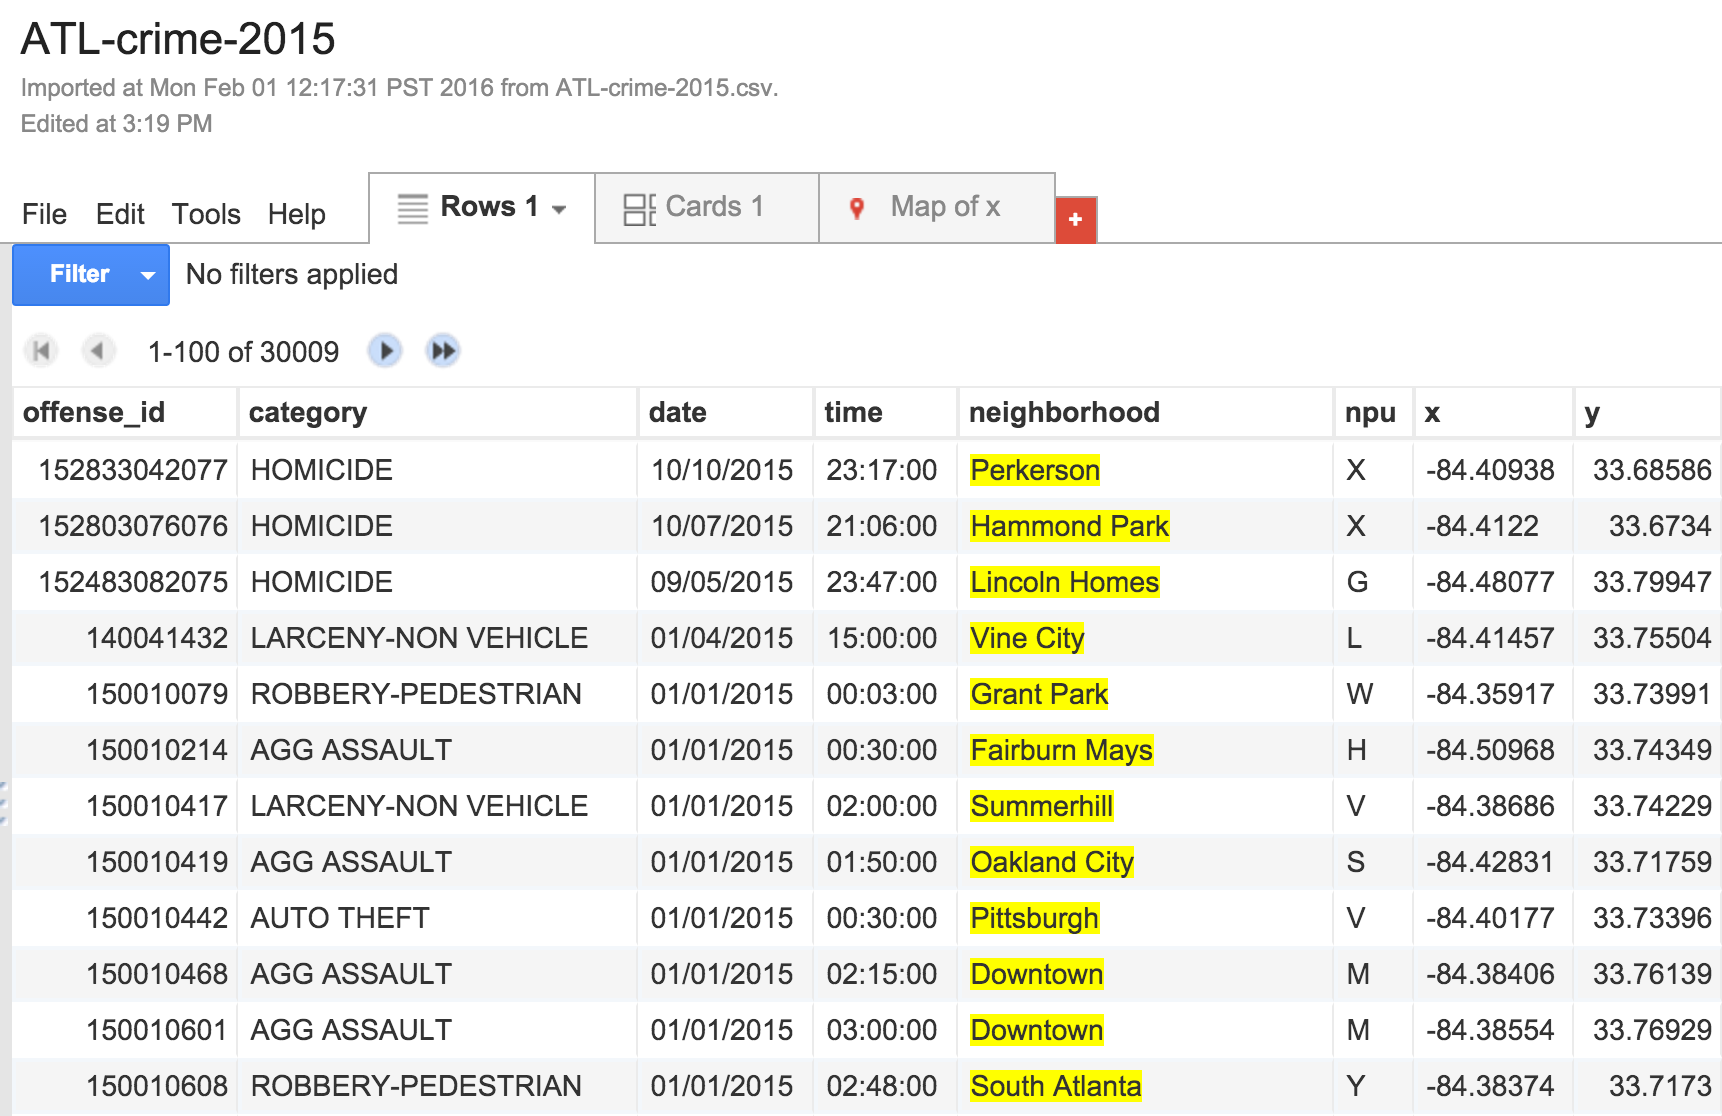

In [5]:
from IPython.display import Image
Image("csv.png")

## Mapping the data points

The first thing we have to do is tell Fusion Tables which column to use. The APD data has geocoordinates in the x and y columns. So we just need to tell Fusion Tables to use those columns.

Click "Map of x" Tab, rename it to "ATL crime map"

Go to **Edit > Change Column**

Select the y column and set its **Type** to **Location** (you may need to set other columns to their corresponding types first)

Then click the **Two column location** and set **Latitude** to **y** and **Longitude** to **x**. Change **Location** to **y**.

Then click the **Save** button.

It'll take a few moments for Fusion Tables to update the schema, and then it will look like this:

<!-- ![title](point-map.png) -->

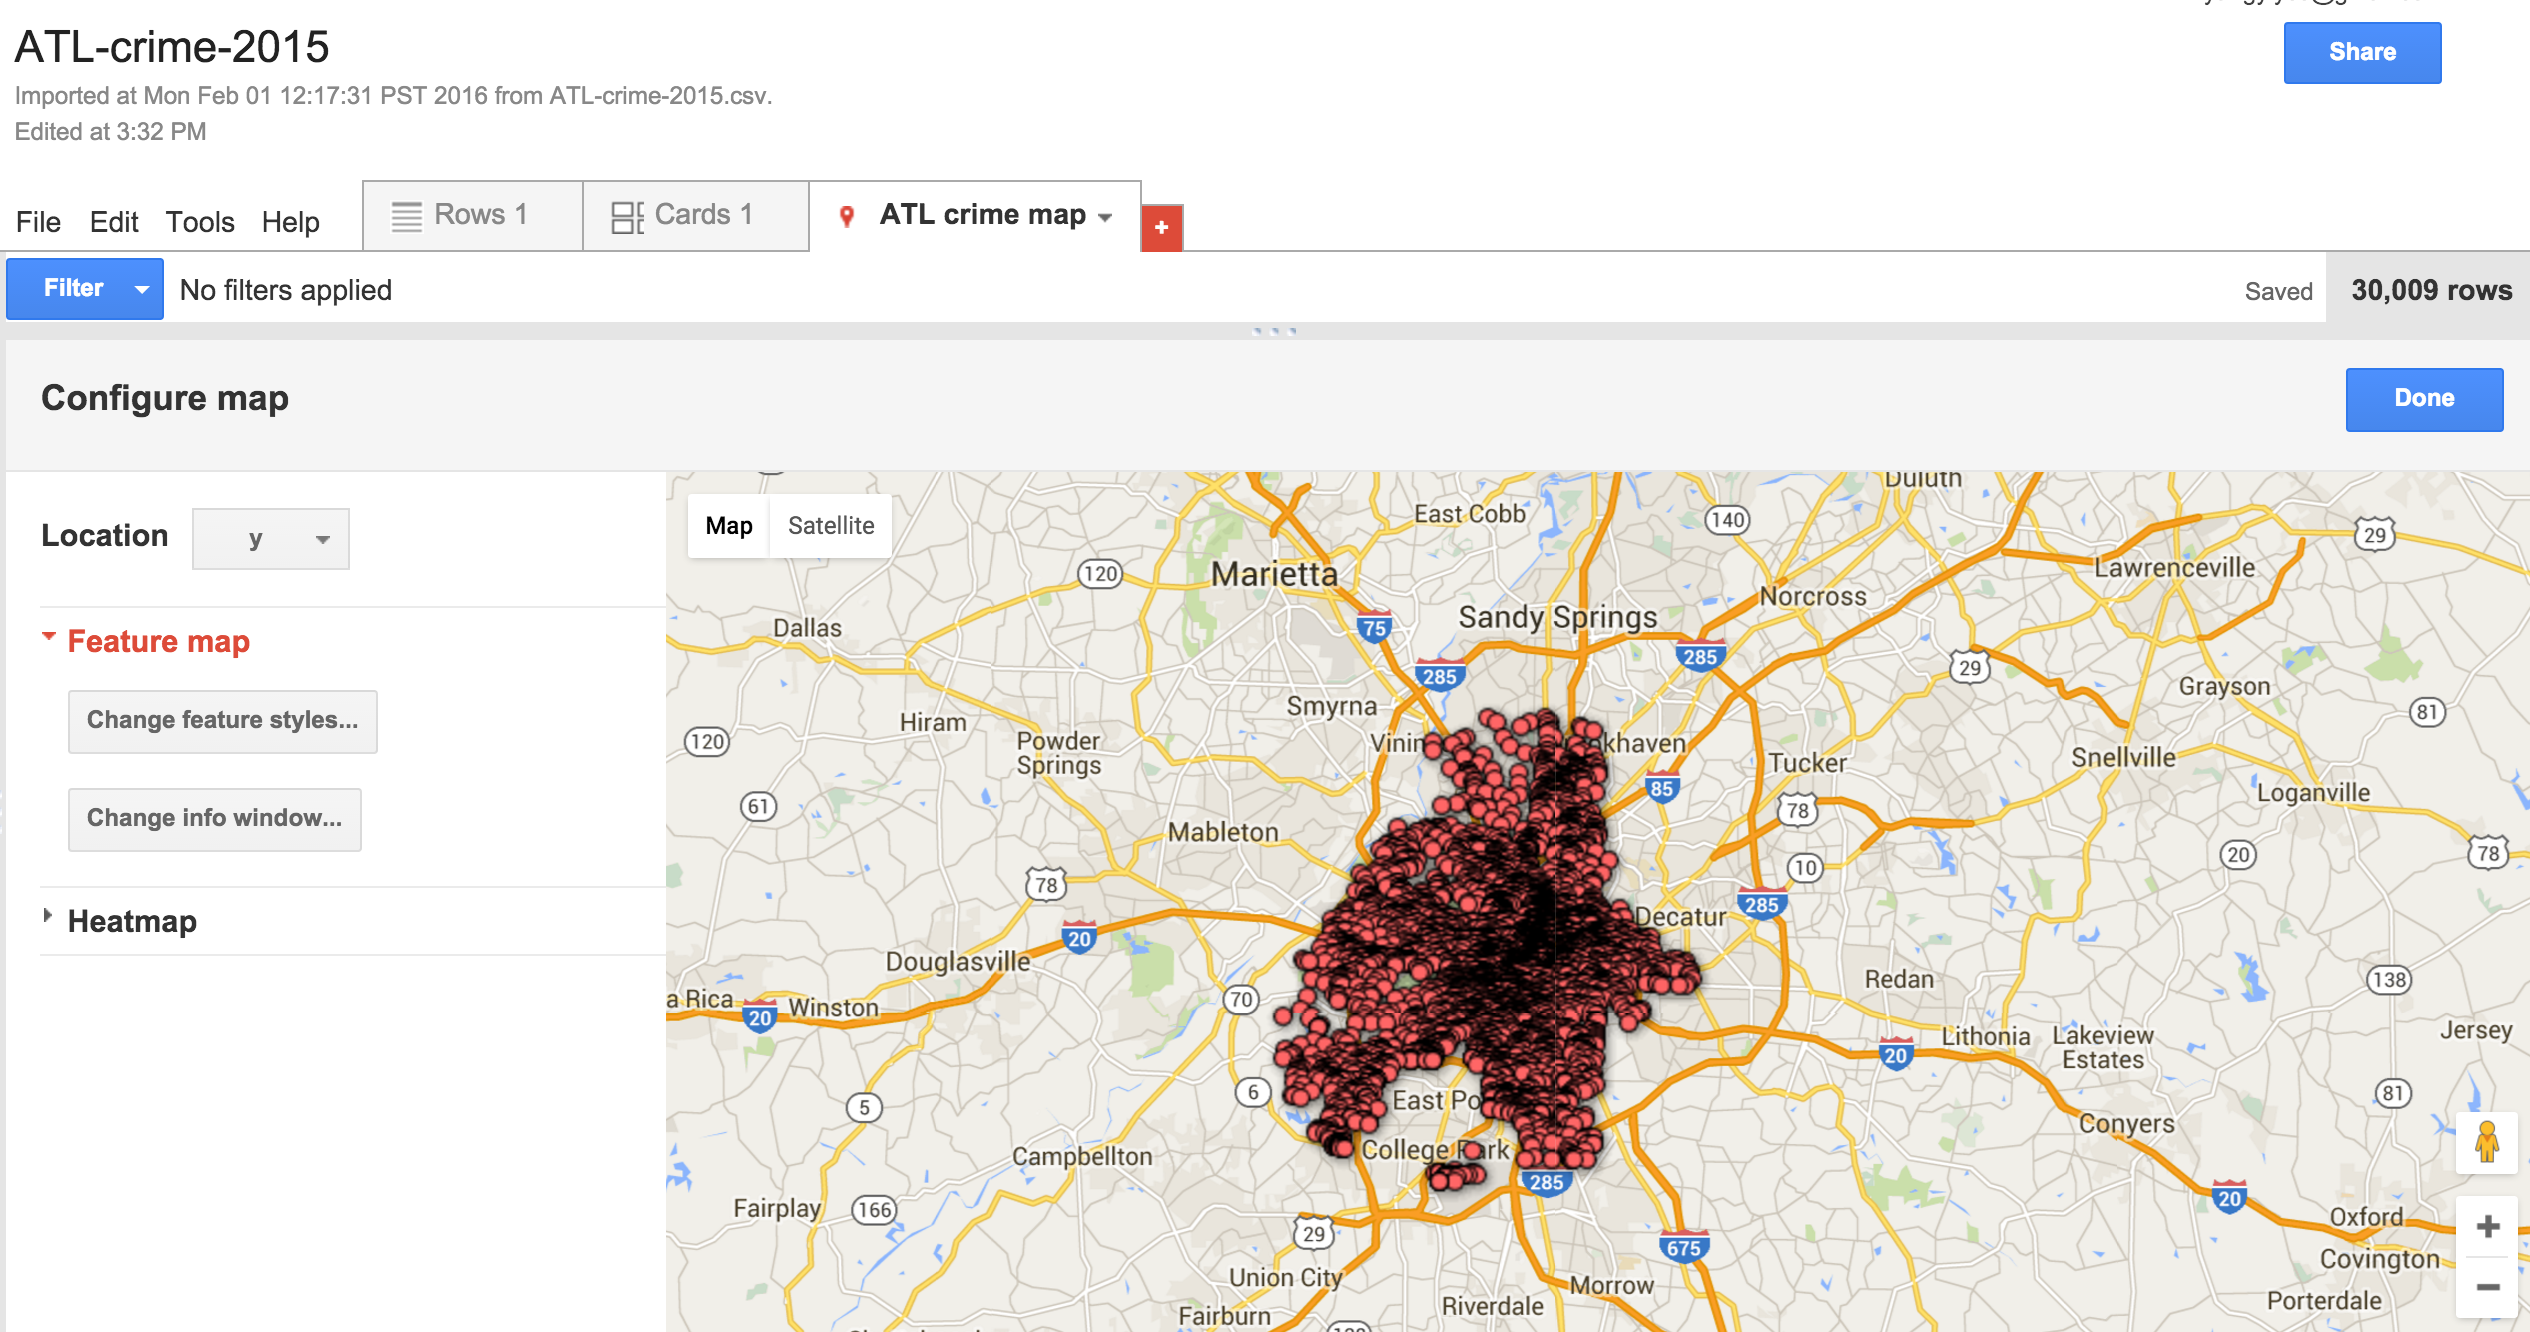

In [6]:
Image("point-map.png")

### Filter

There's far too many dots on this map now, so let's filter out some ones using FT's built-in filtering capability.

In the Map tab, click on the blue Filter button. This will bring up a dropdown menu. Choose the category field.

A sidebar will appear on the left side. Check **HOMICIDE**, **RAPE** and **ROBBERY-RESIDENCE**. 

The new map includes only 419 incidents now:

<!-- ![title](filter.png) -->

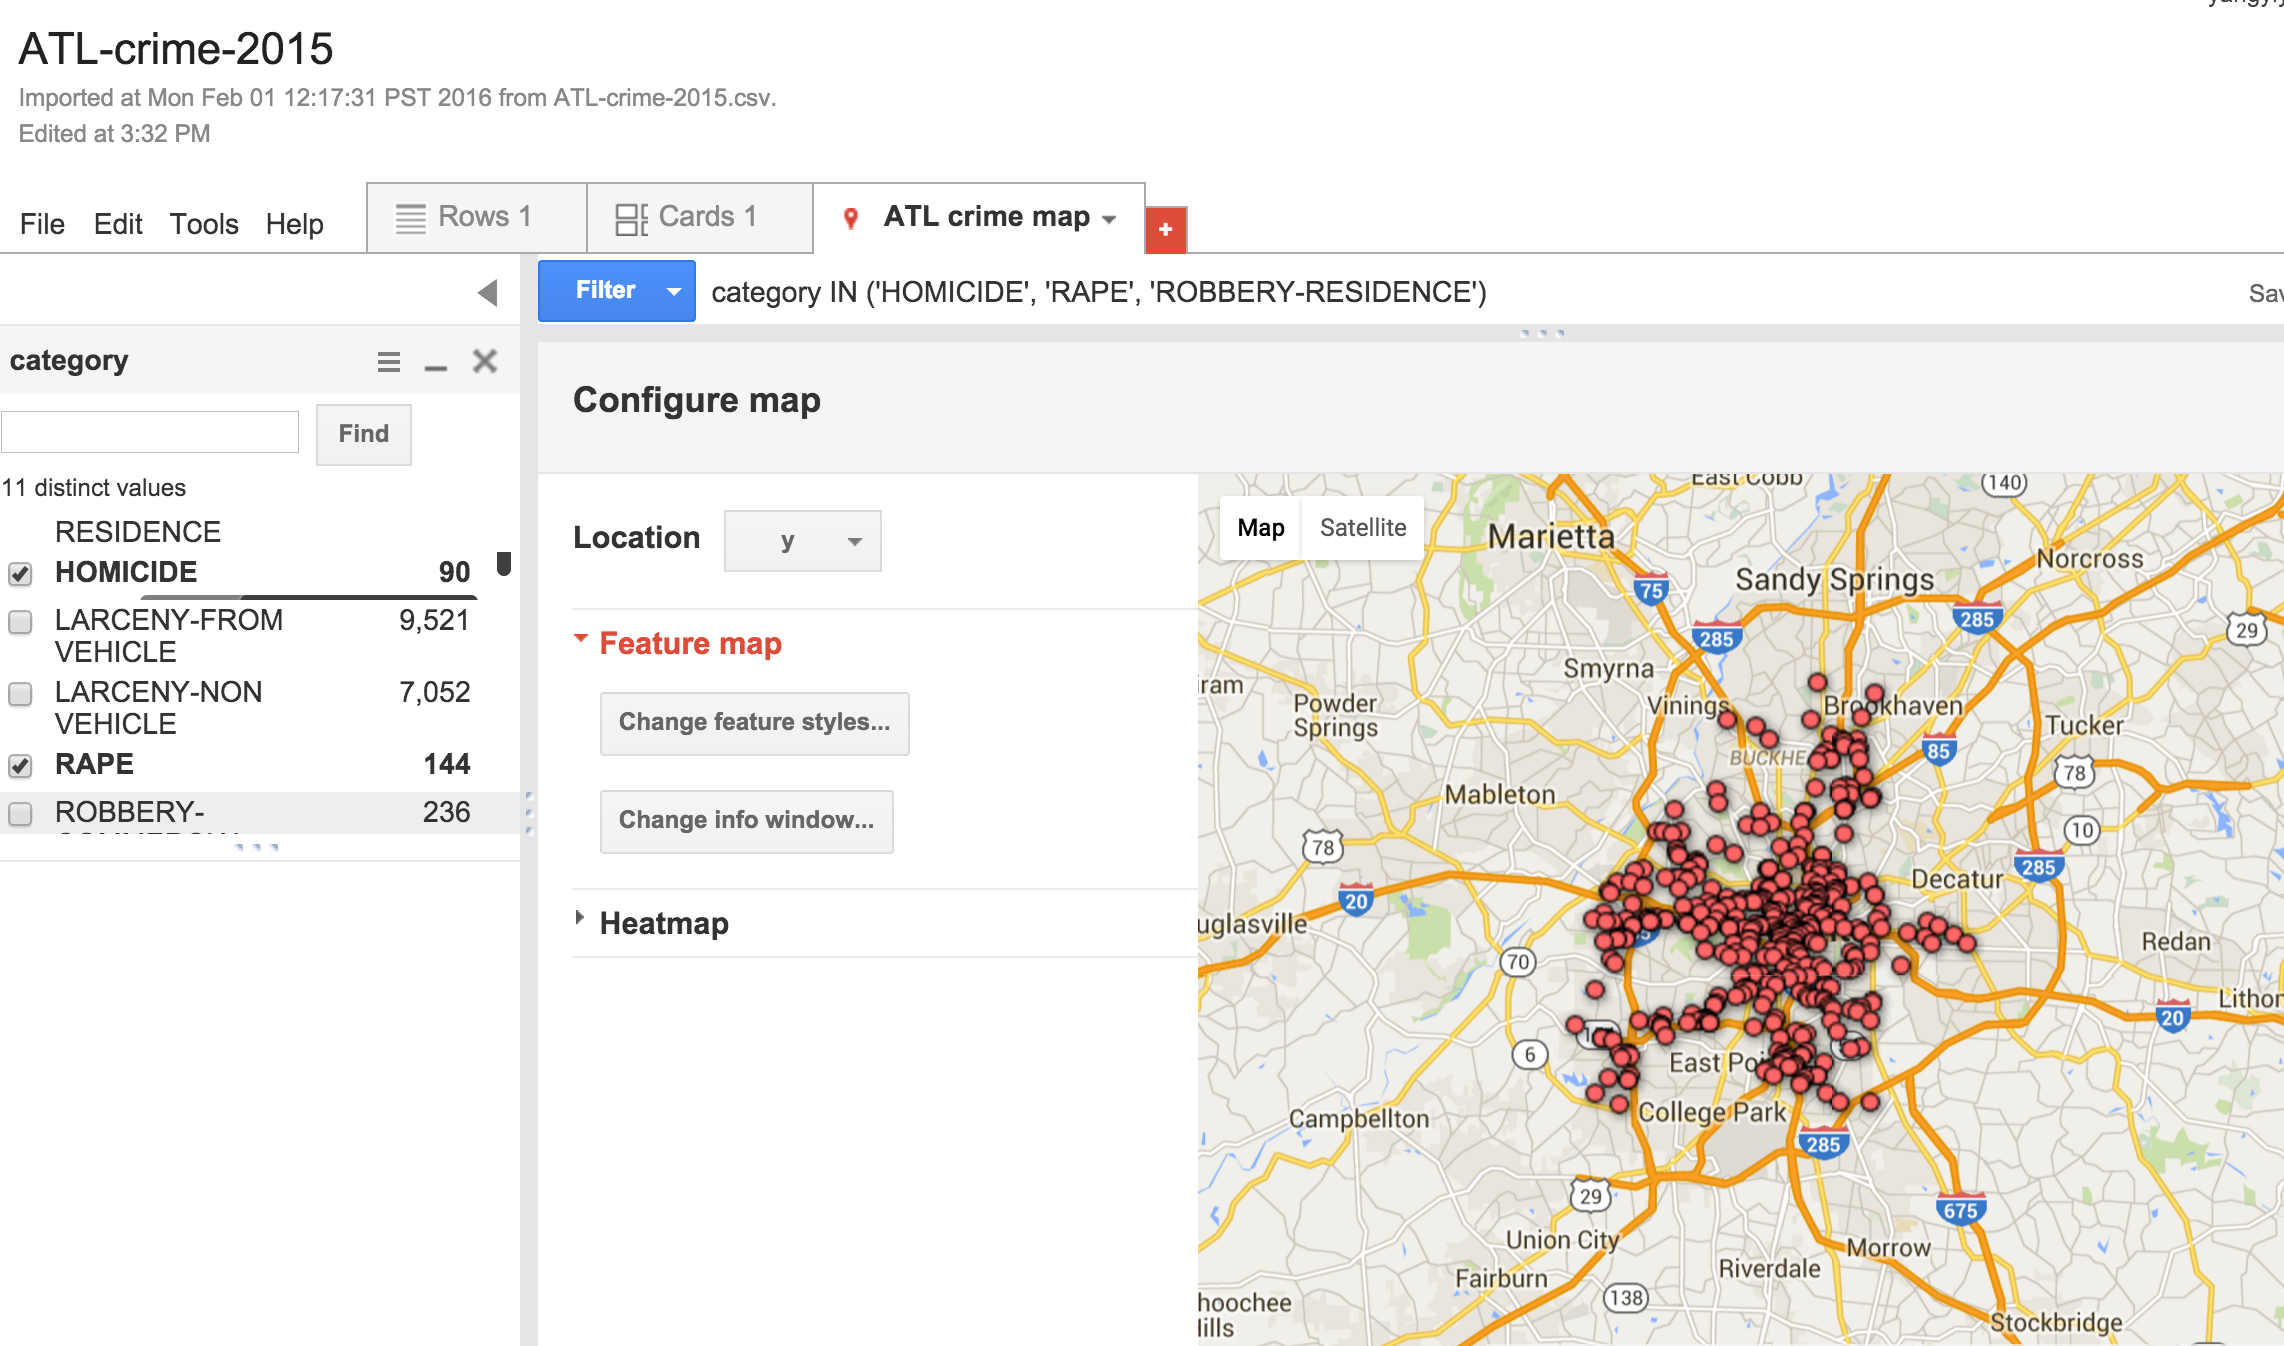

In [7]:
Image("filter.png")

### Specifying different map markers

To customize the map markers, we need to click **Change feature styles**. This will open a new popup window titled, Change map feature styles. 

Since we are working with **Points**, we have three choices **Fixed**, **Column** and **Bucket**. It's fairly easy to work with **Fixed** and **Bucket**, so let's do something with **Column**, which reveals the option to Use icon specified in a column.

Problem is, we don't have [a column in the way that Fusion Tables wants it](https://support.google.com/fusiontables/answer/2679986?hl=en). Let's modify the csv file and insert a new column **icon**.

In [1]:
with open("ATL-crime-2015.csv", "rb") as fi, open("ATL-crime-2015-icon.csv", "w") as fo:
    header = fi.readline().strip()
    fo.write(header + ",icon\n")
    for line in fi:
        parts = line.strip().split(",")
        icon = "small_red"
        if parts[1] == "HOMICIDE": icon = "large_yellow"
        elif parts[1] == "RAPE": icon = "large_blue"
        elif parts[1] == "ROBBERY-RESIDENCE": icon = "large_green"
        fo.write("%s,%s\n" %(line.strip(), icon))
        

Let's import the new file "ATL-crime-2015-icon.csv", and start over all the above steps again.

Click **Change feature styles -> Column**, and choose **Use icon specified in a column -> icon**. Finally, click **Save**, and the new map looks like this:

<!-- ![title](icon.png) -->

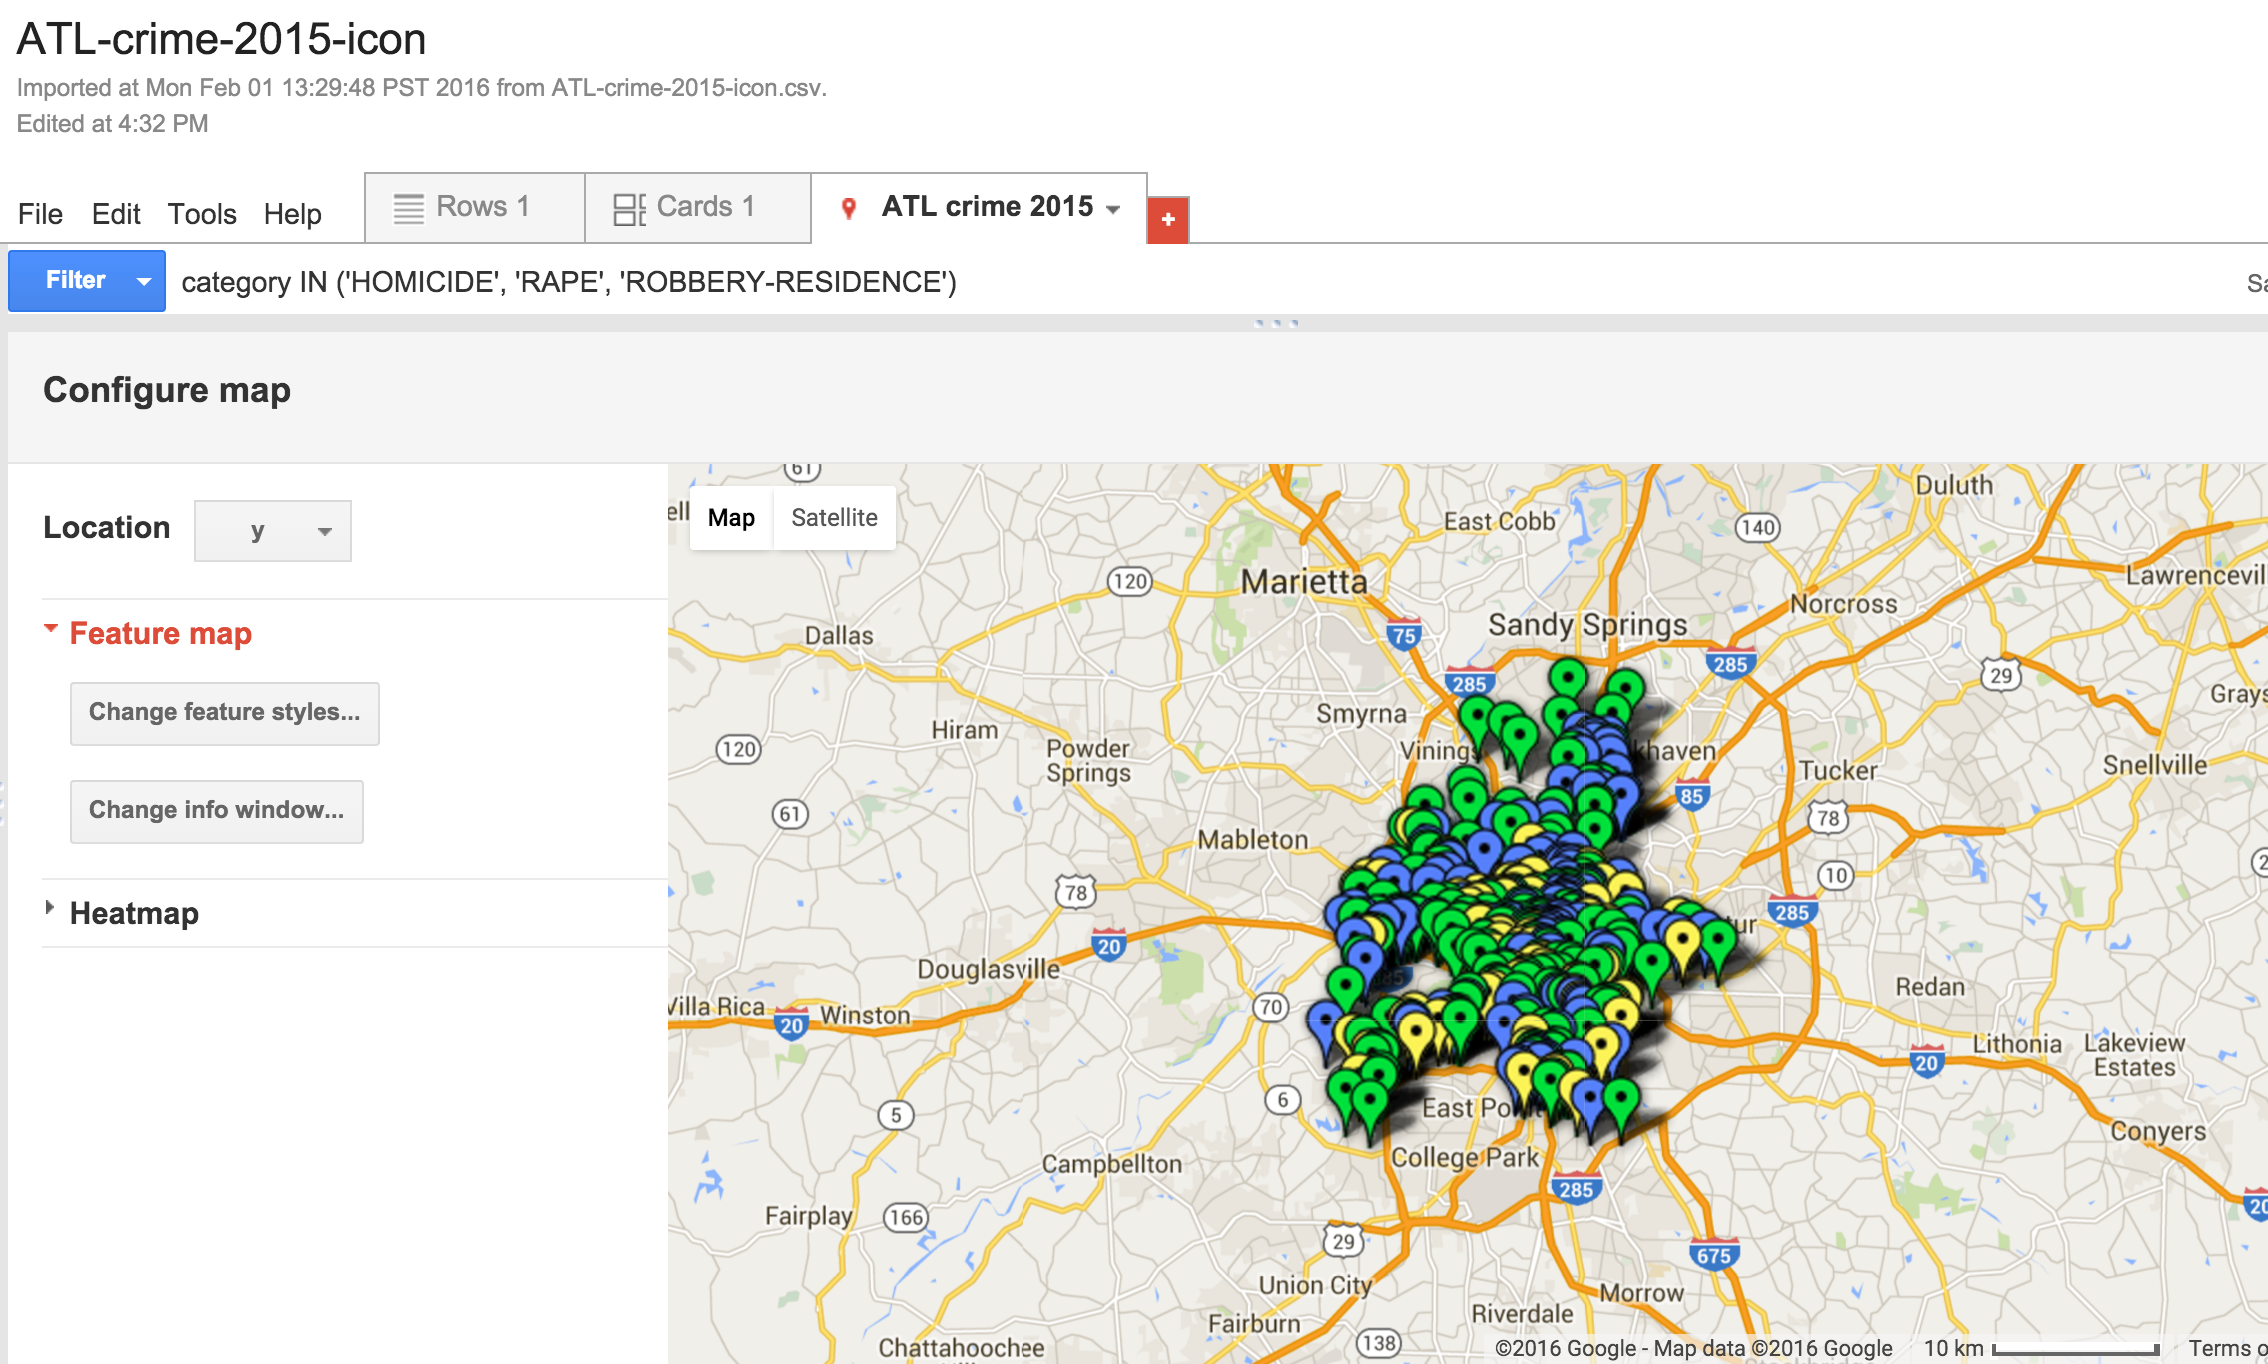

In [8]:
Image("icon.png")

You can find my published map [here](https://www.google.com/fusiontables/DataSource?docid=1roYqcFKqRSLslYRqefR6YRQi5lMlik1uJTjdNL6K).